# Sinh câu hỏi và câu trả lời có trích dẫn dùng Groq API dựa trên Vector Database

Notebook này minh họa cách sử dụng module `question_generator.py` để sinh cả câu hỏi và câu trả lời (có trích dẫn các văn bản pháp luật liên quan) từ các chunks trong vector database theo ba thang đo của Bloom (Remember, Understand, Apply).

In [1]:
# Import các thư viện cần thiết
import os
import sys
import json
from pathlib import Path
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Đảm bảo có thể import modules từ src
MODULE_PATH = os.path.abspath(os.path.join('..'))
if MODULE_PATH not in sys.path:
    sys.path.append(MODULE_PATH)

In [2]:
# Load biến môi trường từ file .env
load_dotenv()

# Kiểm tra xem đã có GROQ_API_KEY chưa
groq_api_key = os.getenv('GROQ_API_KEY')
if groq_api_key is None or groq_api_key == "your_groq_api_key_here":
    raise ValueError("⚠️ Chưa cấu hình GROQ_API_KEY trong file .env. "
                    "Hãy thêm GROQ_API_KEY=<your_api_key> vào file .env!")

## Import các module cần thiết

In [3]:
# Import các module cần thiết từ project
from src.embed.faiss_manager import initialize_embedding_model, load_vector_db
from src.generation.question_generator import GroqQuestionGenerator, generate_questions_from_topics

2025-04-22 00:17:16,138 - question_generator - INFO - Logger 'question_generator' đã được khởi tạo.
INFO:question_generator:Logger 'question_generator' đã được khởi tạo.
INFO:question_generator:Logger 'question_generator' đã được khởi tạo.


## Đọc danh sách chủ đề từ file

In [4]:
# Đường dẫn tới file chủ đề
topic_file_path = Path("../data/sample_topics.txt")

# Đọc danh sách chủ đề
with open(topic_file_path, "r", encoding="utf-8") as f:
    topics = [line.strip() for line in f.readlines() if line.strip()]

print(f"📋 Đã tìm thấy {len(topics)} chủ đề:")
for i, topic in enumerate(topics, 1):
    print(f"  {i}. {topic}")

📋 Đã tìm thấy 5 chủ đề:
  1. Luật Bảo vệ sức khỏe cộng đồng
  2. Quyền lợi y tế người cao tuổi
  3. Chính sách y tế học đường
  4. Quy định về an toàn thực phẩm
  5. Chính sách bảo hiểm y tế


## Khởi tạo model embedding và load vector database

In [5]:
# Đường dẫn tới vector database
vector_db_path = Path("../data/gold/db_faiss_phapluat_yte_full_final")

# Khởi tạo model embedding
embedding_model_name = "bkai-foundation-models/vietnamese-bi-encoder"
embeddings = initialize_embedding_model(embedding_model_name)

if not embeddings:
    raise ValueError(f"❌ Không thể khởi tạo model embedding '{embedding_model_name}'")
else:
    print(f"✅ Đã khởi tạo model embedding '{embedding_model_name}' thành công")

✅ Đã khởi tạo model embedding 'bkai-foundation-models/vietnamese-bi-encoder' thành công


In [6]:
# Load vector database
vector_db = load_vector_db(vector_db_path, embeddings)

if not vector_db:
    raise ValueError(f"❌ Không thể tải vector database từ {vector_db_path}")
else:
    print(f"✅ Đã tải vector database thành công. Số lượng vectors: {vector_db.index.ntotal}")

✅ Đã tải vector database thành công. Số lượng vectors: 15498


## Khởi tạo Question Generator với Groq API

In [7]:
# Khởi tạo generator với model Llama 3 của Groq
try:
    generator = GroqQuestionGenerator(model_name="llama3-70b-8192")
    print("✅ Đã khởi tạo thành công Generator với Groq API")
except Exception as e:
    print(f"❌ Lỗi khi khởi tạo Generator: {e}")

2025-04-22 00:17:38,905 - question_generator - INFO - Đã khởi tạo Groq Client với model 'llama3-70b-8192'
INFO:question_generator:Đã khởi tạo Groq Client với model 'llama3-70b-8192'
INFO:question_generator:Đã khởi tạo Groq Client với model 'llama3-70b-8192'


✅ Đã khởi tạo thành công Generator với Groq API


## Sinh câu hỏi và câu trả lời có trích dẫn cho một chủ đề thử nghiệm

In [8]:
# Chọn một chủ đề để thử nghiệm
test_topic = topics[0]  # Chủ đề đầu tiên trong danh sách

print(f"🔍 Sinh câu hỏi và câu trả lời có trích dẫn cho chủ đề: '{test_topic}'...")

# Sinh câu hỏi và câu trả lời
questions_by_level = generator.generate_questions_for_topic(
    topic=test_topic,
    vector_db=vector_db,
    num_questions_per_level=2,  # 2 câu hỏi mỗi cấp độ
    chunks_per_topic=5,         # Sử dụng 5 chunks
    temperature=0.7             # Độ sáng tạo
)

2025-04-22 00:17:38,920 - question_generator - INFO - Bắt đầu sinh câu hỏi cho chủ đề: 'Luật Bảo vệ sức khỏe cộng đồng'
INFO:question_generator:Bắt đầu sinh câu hỏi cho chủ đề: 'Luật Bảo vệ sức khỏe cộng đồng'
INFO:question_generator:Bắt đầu sinh câu hỏi cho chủ đề: 'Luật Bảo vệ sức khỏe cộng đồng'


🔍 Sinh câu hỏi và câu trả lời có trích dẫn cho chủ đề: 'Luật Bảo vệ sức khỏe cộng đồng'...


2025-04-22 00:17:39,194 - question_generator - INFO - Đã trích xuất 5 chunks cho chủ đề 'Luật Bảo vệ sức khỏe cộng đồng'
INFO:question_generator:Đã trích xuất 5 chunks cho chủ đề 'Luật Bảo vệ sức khỏe cộng đồng'
INFO:question_generator:Đã trích xuất 5 chunks cho chủ đề 'Luật Bảo vệ sức khỏe cộng đồng'
2025-04-22 00:17:40,689 - question_generator - INFO - Thời gian sinh cặp câu hỏi-trả lời cấp độ remember: 1.49 giây
INFO:question_generator:Thời gian sinh cặp câu hỏi-trả lời cấp độ remember: 1.49 giây
2025-04-22 00:17:40,692 - question_generator - ERROR - Lỗi khi gọi Groq API hoặc xử lý kết quả: Expecting value: line 1 column 1 (char 0)
ERROR:question_generator:Lỗi khi gọi Groq API hoặc xử lý kết quả: Expecting value: line 1 column 1 (char 0)
2025-04-22 00:17:40,694 - question_generator - INFO - Đã sinh 0 cặp câu hỏi-trả lời cấp độ remember cho chủ đề 'Luật Bảo vệ sức khỏe cộng đồng'
INFO:question_generator:Đã sinh 0 cặp câu hỏi-trả lời cấp độ remember cho chủ đề 'Luật Bảo vệ sức khỏe cộ

In [9]:
# Hiển thị kết quả
print(f"\n📝 Kết quả sinh câu hỏi và câu trả lời có trích dẫn cho '{test_topic}':\n")

bloom_level_names = {
    "remember": "🧠 Remember (Nhớ)",
    "understand": "🤔 Understand (Hiểu)", 
    "apply": "🛠️ Apply (Áp dụng)"
}

for level, qa_pairs in questions_by_level.items():
    print(f"\n{bloom_level_names[level]}:\n")
    
    for i, qa_pair in enumerate(qa_pairs, 1):
        print(f"{i}. Câu hỏi: {qa_pair['question']}")
        print(f"   Trả lời: {qa_pair['answer']}\n")
        print(f"   Trích dẫn: {qa_pair.get('citations', 'Không có trích dẫn')}\n")
        
        # Hiển thị nguồn tham khảo (chunks)
        source_chunks = qa_pair.get('source_chunks', [])
        if source_chunks:
            print(f"   Nguồn tham khảo:")
            for src in source_chunks:
                chunk_id = src.get('chunk_id')
                metadata = src.get('metadata', {})
                title = metadata.get('title', 'Không rõ tiêu đề')
                law_id = metadata.get('law_id', 'Không rõ số hiệu')
                print(f"     - Chunk {chunk_id}: {title}, Số hiệu: {law_id}")
            print("\n" + "-"*80 + "\n")


📝 Kết quả sinh câu hỏi và câu trả lời có trích dẫn cho 'Luật Bảo vệ sức khỏe cộng đồng':


🧠 Remember (Nhớ):


🤔 Understand (Hiểu):

1. Câu hỏi: Giải thích các điều kiện đối với kinh doanh, bảo quản, vận chuyển thực phẩm chức năng?
   Trả lời: Theo Điều 15 của Thông tư số 16/2012/TT-BYT, các điều kiện đối với kinh doanh, bảo quản, vận chuyển thực phẩm chức năng bao gồm cơ sở vật chất, trang thiết bị, dụng cụ và người trực tiếp kinh doanh phải thực hiện theo quy định tại các điều 4, 5 và 6 của Thông tư số 16/2012/TT-BYT. Ngoài ra, thực phẩm chức năng phải được bày bán riêng biệt với khu vực bày bán các loại thực phẩm khác.

   Trích dẫn: Thông tư số 16/2012/TT-BYT

   Nguồn tham khảo:
     - Chunk 1: Không rõ tiêu đề, Số hiệu: Không rõ số hiệu

--------------------------------------------------------------------------------

2. Câu hỏi: Giải thích nội dung chăm sóc sức khỏe người cao tuổi tại cộng đồng?
   Trả lời: Theo Điều 3, nội dung chăm sóc sức khỏe người cao tuổi tại cộng đồng ba

## Sinh câu hỏi và câu trả lời có trích dẫn cho tất cả các chủ đề

In [10]:
# Thay đổi thông số nếu muốn
num_questions_per_level = 2
chunks_per_topic = 5
groq_model = "llama3-70b-8192"  # Hoặc "llama3-8b-8192" nếu muốn tiết kiệm tokens

print(f"🚀 Bắt đầu sinh câu hỏi và câu trả lời có trích dẫn cho {len(topics)} chủ đề...\n")

🚀 Bắt đầu sinh câu hỏi và câu trả lời có trích dẫn cho 5 chủ đề...



In [11]:
# Sinh câu hỏi và câu trả lời cho tất cả chủ đề
all_questions = generate_questions_from_topics(
    topic_file_path=topic_file_path,
    vector_db_path=vector_db_path,
    output_dir="../outputs",
    embedding_model_name=embedding_model_name,
    groq_model_name=groq_model,
    num_questions_per_level=num_questions_per_level,
    chunks_per_topic=chunks_per_topic
)

2025-04-22 00:17:43,772 - question_generator - INFO - Bắt đầu quá trình sinh câu hỏi từ các chủ đề
INFO:question_generator:Bắt đầu quá trình sinh câu hỏi từ các chủ đề
2025-04-22 00:17:43,772 - question_generator - INFO - Đã đọc 5 chủ đề từ file ..\data\sample_topics.txt
INFO:question_generator:Đã đọc 5 chủ đề từ file ..\data\sample_topics.txt
INFO:question_generator:Bắt đầu quá trình sinh câu hỏi từ các chủ đề
2025-04-22 00:17:43,772 - question_generator - INFO - Đã đọc 5 chủ đề từ file ..\data\sample_topics.txt
INFO:question_generator:Đã đọc 5 chủ đề từ file ..\data\sample_topics.txt
2025-04-22 00:17:47,394 - question_generator - INFO - Đã tải vector database thành công. Số lượng vectors: 15498
INFO:question_generator:Đã tải vector database thành công. Số lượng vectors: 15498
2025-04-22 00:17:47,394 - question_generator - INFO - Đã tải vector database thành công. Số lượng vectors: 15498
INFO:question_generator:Đã tải vector database thành công. Số lượng vectors: 15498
2025-04-22 00:1

## Phân tích kết quả và trích dẫn

In [12]:
# Tạo DataFrame từ danh sách câu hỏi
df_questions = pd.DataFrame(all_questions)

# Thống kê về trích dẫn
df_questions['has_citations'] = df_questions['citations'].apply(lambda x: len(x) > 0 if isinstance(x, str) else False)
df_questions['num_source_chunks'] = df_questions['source_chunks'].apply(len)

# Hiển thị thông tin tổng quan
print("📊 Tổng quan về câu hỏi và trích dẫn:")
print(f"- Tổng số câu hỏi: {len(df_questions)}")
print(f"- Số câu hỏi có trích dẫn: {df_questions['has_citations'].sum()} ({df_questions['has_citations'].mean() * 100:.1f}%)")
print(f"- Số chunks trung bình được sử dụng mỗi câu hỏi: {df_questions['num_source_chunks'].mean():.2f}")

# Thống kê theo cấp độ Bloom
print("\n📊 Thống kê theo cấp độ Bloom:")
bloom_stats = df_questions.groupby('level').agg({
    'question': 'count',
    'has_citations': 'mean',
    'num_source_chunks': 'mean'
}).reset_index()

bloom_stats.columns = ['Cấp độ', 'Số câu hỏi', '% có trích dẫn', 'Số chunks trung bình']
bloom_stats['% có trích dẫn'] = bloom_stats['% có trích dẫn'] * 100
display(bloom_stats)

📊 Tổng quan về câu hỏi và trích dẫn:
- Tổng số câu hỏi: 20
- Số câu hỏi có trích dẫn: 19 (95.0%)
- Số chunks trung bình được sử dụng mỗi câu hỏi: 1.05

📊 Thống kê theo cấp độ Bloom:


,Cấp độ,Số câu hỏi,% có trích dẫn,Số chunks trung bình
0,apply,10,100.000000,1.1
1,remember,4,100.000000,1.0
2,understand,6,83.333333,1.0


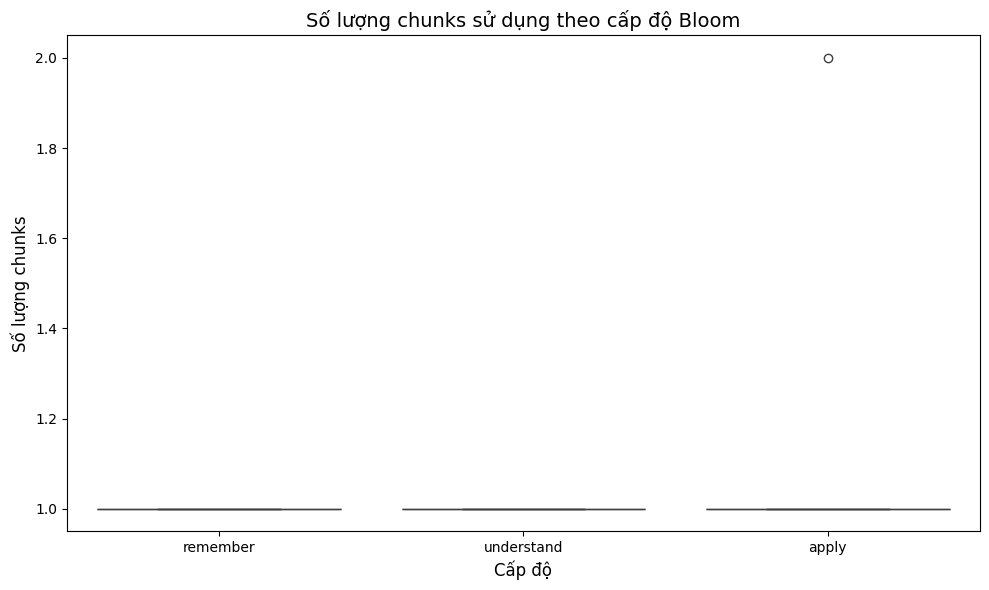

In [13]:
# Hiển thị phân bố số chunks sử dụng theo cấp độ Bloom
plt.figure(figsize=(10, 6))
sns.boxplot(x="level", y="num_source_chunks", data=df_questions)
plt.title("Số lượng chunks sử dụng theo cấp độ Bloom", fontsize=14)
plt.xlabel("Cấp độ", fontsize=12)
plt.ylabel("Số lượng chunks", fontsize=12)
plt.tight_layout()
plt.show()

## Hiển thị chi tiết một câu hỏi với trích dẫn và nguồn

In [14]:
# Chọn một câu hỏi để hiển thị chi tiết
import pprint

# Tìm câu hỏi có trích dẫn và nhiều nguồn
sample_questions = df_questions[df_questions['has_citations'] & (df_questions['num_source_chunks'] > 1)]
if not sample_questions.empty:
    sample = sample_questions.iloc[0].to_dict()
else:
    sample = all_questions[0]

print("📝 Chi tiết một câu hỏi với trích dẫn và nguồn:\n")
print(f"Chủ đề: {sample['topic']}")
print(f"Cấp độ: {sample['level']}")
print(f"\nCâu hỏi: {sample['question']}")
print(f"\nCâu trả lời: {sample['answer']}")
print(f"\nTrích dẫn: {sample['citations']}")

print("\nThông tin về các chunks sử dụng:")
for chunk in sample['source_chunks']:
    print(f"\n- Chunk {chunk.get('chunk_id')}:"),
    metadata = chunk.get('metadata', {})
    for key, value in metadata.items():
        print(f"  + {key}: {value}")
    print(f"  + độ tương đồng: {chunk.get('score', 'N/A')}")

📝 Chi tiết một câu hỏi với trích dẫn và nguồn:

Chủ đề: Quyền lợi y tế người cao tuổi
Cấp độ: apply

Câu hỏi: Tại trạm y tế xã, phường, thị trấn, người cao tuổi có thể được chăm sóc sức khỏe như thế nào?

Câu trả lời: Tại trạm y tế xã, phường, thị trấn, người cao tuổi có thể được khám bệnh, chữa bệnh và phục hồi chức năng dựa vào cộng đồng để phòng ngừa và phục hồi các di chứng do chấn thương, tai nạn hoặc do các bệnh tai biến mạch máu não, bệnh mạn tính, bệnh nghề nghiệp và các bệnh khác.

Trích dẫn: Thông tư số 35/2011/TT-BYT ngày 15 tháng 10 năm 2011 của Bộ trưởng Bộ Y tế hướng dẫn thực hiện chăm sóc sức khỏe người cao tuổi

Thông tin về các chunks sử dụng:

- Chunk 3:
  + document_id: 35/2011/TT-BYT
  + document_type: Thông tư
  + effective_date: 2011-12-01
  + source_link: https://vbpl.vn/boyte/Pages/vbpq-toanvan.aspx?ItemID=27085&Keyword=
  + domain: 
  + Chương: II
  + Điều: 3
  + Khoản: 5
  + location_detail: Chương II: CHĂM SÓC SỨC KHỎE CHO NGƯỜI CAO TUỔI TẠI CỘNG ĐỒNG VÀ QUẢN

## Lưu kết quả thành JSON với metadata đầy đủ

In [15]:
# Thư mục lưu kết quả
output_path = Path("../outputs/question_generation")
output_path.mkdir(parents=True, exist_ok=True)

# Tạo tên file với timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_file = output_path / f"questions_with_citations_groq_{timestamp}_jupyter.json"

# Đảm bảo các đối tượng datetime được chuyển thành chuỗi
class DateTimeEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, datetime):
            return obj.isoformat()
        return super(DateTimeEncoder, self).default(obj)

# Lưu kết quả với định dạng JSON
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(all_questions, f, ensure_ascii=False, indent=2, cls=DateTimeEncoder)

print(f"✅ Đã lưu kết quả vào file: {output_file}")

✅ Đã lưu kết quả vào file: ..\outputs\question_generation\questions_with_citations_groq_20250422_002243_jupyter.json


## Thống kê các văn bản pháp luật được trích dẫn

In [16]:
# Phân tích các văn bản pháp luật được trích dẫn
import re

# Tìm các từ khóa liên quan đến văn bản pháp luật
law_keywords = [
    "luật", "nghị định", "thông tư", "quyết định", "văn bản", "pháp luật", 
    "nghị quyết", "hiến pháp", "bộ luật", "ND-CP", "TT-BYT", "QĐ"
]

# Tạo pattern để tìm kiếm
pattern = re.compile('|'.join(law_keywords), re.IGNORECASE)

# Hàm trích xuất các văn bản pháp luật từ trích dẫn và câu trả lời
def extract_legal_docs(text):
    if not isinstance(text, str):
        return []
    
    # Tìm tất cả các câu có chứa từ khóa pháp luật
    sentences = re.split(r'[.;!?]\s+', text)
    legal_docs = []
    
    for sentence in sentences:
        if pattern.search(sentence):
            legal_docs.append(sentence.strip())
    
    return legal_docs

# Áp dụng hàm trích xuất
all_legal_docs = []
for _, row in df_questions.iterrows():
    docs_from_citations = extract_legal_docs(row['citations'])
    docs_from_answer = extract_legal_docs(row['answer'])
    all_legal_docs.extend(docs_from_citations + docs_from_answer)

# Lọc và đếm các văn bản pháp luật xuất hiện nhiều nhất
from collections import Counter

# Đếm số lần xuất hiện
legal_docs_counter = Counter(all_legal_docs)
top_legal_docs = legal_docs_counter.most_common(10)

print("📋 Các văn bản pháp luật được trích dẫn nhiều nhất:\n")
for doc, count in top_legal_docs:
    print(f"- {doc}: {count} lần")

📋 Các văn bản pháp luật được trích dẫn nhiều nhất:

- Thông tư số XX/20XX/TT-BYT: 4 lần
- Thông tư số 16/2012/TT-BYT: 3 lần
- Thông tư số 35/2011/TT-BYT ngày 15 tháng 10 năm 2011 của Bộ trưởng Bộ Y tế hướng dẫn thực hiện chăm sóc sức khỏe người cao tuổi: 2 lần
- Thông tư hướng dẫn thực hiện quản lý an toàn vệ sinh thực phẩm trong kinh doanh, dịch vụ và phục vụ ăn uống: 2 lần
- Thông tư Hướng dẫn thực hiện quản lý an toàn vệ sinh thực phẩm trong kinh doanh, dịch vụ và phục vụ ăn uống: 2 lần
- Cơ sở vật chất, trang thiết bị, dụng cụ và người trực tiếp kinh doanh phải thực hiện theo quy định tại các điều 4, 5 và 6 Thông tư số 16/2012/TT-BYT ngày 22 tháng 10 năm 2012 của Bộ trưởng Bộ Y tế.: 1 lần
- Để kinh doanh, bảo quản, vận chuyển thực phẩm chức năng, cơ sở vật chất, trang thiết bị, dụng cụ và người trực tiếp kinh doanh phải thực hiện theo quy định tại các điều 4, 5 và 6 Thông tư số 16/2012/TT-BYT ngày 22 tháng 10 năm 2012 của Bộ trưởng Bộ Y tế: 1 lần
- Theo Điều 15 Thông tư số 16/2012/

## Kết luận

Notebook này đã minh họa cách sử dụng module `question_generator.py` để sinh câu hỏi và câu trả lời có trích dẫn từ các chunks trong vector database theo ba thang đo của Bloom (Remember, Understand, Apply).

Chúng ta đã:
1. Khởi tạo model embedding và load vector database
2. Sinh câu hỏi và câu trả lời có trích dẫn văn bản pháp luật
3. Phân tích trích dẫn và nguồn được sử dụng
4. Lưu kết quả vào file JSON với metadata đầy đủ

Mỗi câu hỏi được lưu với cấu trúc JSON bao gồm:
- `topic`: Chủ đề của câu hỏi
- `level`: Cấp độ Bloom (remember, understand, apply)
- `question`: Nội dung câu hỏi
- `answer`: Nội dung câu trả lời có trích dẫn
- `citations`: Tên đầy đủ của các văn bản pháp luật được trích dẫn
- `source_chunks`: Thông tin chi tiết về các chunks được sử dụng làm nguồn
- `metadata`: Các thông tin bổ sung như thời gian tạo, model sử dụng